## Corrupted data evaluation (based on rerank.py)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

from typing import Dict
import pandas as pd
import os
from ir_measures import read_trec_run, calc_aggregate, nDCG, R, RR, P
from neural_ir.dataset import PairDataset

# create dataset object for evaluating the queries
dev_dataset = PairDataset(
    collection_path="data/collection.tsv",
    queries_path="data/dev_queries.tsv",
    query_doc_pair_path="data/dev_bm25.trec",
    qrels_path="data/dev_qrels.json",
)

QRELS = dev_dataset.qrels

In [42]:
def evaluate_trec_metrics(
    folder: str, number_steps: int, qrels: Dict = QRELS
) -> pd.DataFrame:
    """
    Evaluates TREC runs for dense models and returns a DataFrame with metrics.

    Parameters:
    folder (str): Path to the folder containing TREC result files.
    number_steps (int): Number of training steps used in the filenames.
    qrels: Ground truth relevance judgments.

    Returns:
    pd.DataFrame: DataFrame containing evaluation metrics for each run.
    """
    trec_files = {
        # SPARSE
        "ce baseline": f"{folder}{number_steps}_ce.trec",
        "ce contractions": f"{folder}{number_steps}_ce_contractions.trec",
        "ce merged": f"{folder}{number_steps}_ce_merged.trec",
        "ce merged typos": f"{folder}{number_steps}_ce_merged_typos.trec",
        "ce typos": f"{folder}{number_steps}_ce_typos.trec",

        # DENSE
        "dense baseline": f"{folder}{number_steps}_dense.trec",
        "dense contractions": f"{folder}{number_steps}_dense_contractions.trec",
        "dense merged": f"{folder}{number_steps}_dense_merged.trec",
        "dense merged typos": f"{folder}{number_steps}_dense_merged_typos.trec",
        "dense typos": f"{folder}{number_steps}_dense_typos.trec",

        # SPARSE
        "sparse baseline": f"{folder}{number_steps}_sparse.trec",
        "sparse contractions": f"{folder}{number_steps}_sparse_contractions.trec",
        "sparse merged": f"{folder}{number_steps}_sparse_merged.trec",
        "sparse merged typos": f"{folder}{number_steps}_sparse_merged_typos.trec",
        "sparse typos": f"{folder}{number_steps}_sparse_typos.trec",
    }

    df_results = pd.DataFrame()

    for name, trec_file in trec_files.items():
        if os.path.exists(trec_file):
            run = read_trec_run(trec_file)
            metrics = calc_aggregate(
                [
                    nDCG @ 10,
                    R @ 10,
                    P @ 10,
                    RR @ 10,
                ],
                qrels,
                run,
            )

            metrics = {str(k): v for k, v in metrics.items()}
            df_results = pd.concat(
                [
                    df_results,
                    pd.DataFrame(
                        [
                            {
                                "Run": name,
                                "nDCG@10": metrics["nDCG@10"],
                                "R@10": metrics["R@10"],
                                "P@10": metrics["P@10"],
                                "RR@10": metrics["RR@10"],
                            }
                        ]
                    ),
                ],
                ignore_index=True,
            )
        else:
            print(f"{trec_file} not found!")

    return df_results

In [45]:
folder = "output/your_creativity/all_metrics_1000/"
number_steps = 1000

df_results = evaluate_trec_metrics(folder, number_steps)
mask_d = df_results["Run"].str.contains("dense")
df_dense_results = df_results[mask_d]

mask_s = df_results["Run"].str.contains("sparse")
df_sparse_results = df_results[mask_s]

display(df_dense_results)
display(df_sparse_results)

output/your_creativity/all_metrics_1000/1000_ce.trec not found!
output/your_creativity/all_metrics_1000/1000_ce_contractions.trec not found!
output/your_creativity/all_metrics_1000/1000_ce_merged.trec not found!
output/your_creativity/all_metrics_1000/1000_ce_merged_typos.trec not found!
output/your_creativity/all_metrics_1000/1000_ce_typos.trec not found!


,Run,nDCG@10,R@10,P@10,RR@10
0,dense baseline,0.720249,0.842500,0.0905,0.693935
1,dense contractions,0.712875,0.837500,0.0900,0.685899
2,dense merged,0.485279,0.636667,0.0680,0.446585
3,dense merged typos,0.268422,0.406667,0.0425,0.228284
4,dense typos,0.421355,0.574167,0.0605,0.380190


,Run,nDCG@10,R@10,P@10,RR@10
5,sparse baseline,0.595865,0.690833,0.0740,0.576623
6,sparse contractions,0.590855,0.689167,0.0735,0.569623
7,sparse merged,0.105840,0.120000,0.0125,0.103125
8,sparse merged typos,0.055809,0.067500,0.0070,0.053750
9,sparse typos,0.057913,0.060000,0.0065,0.060833


In [46]:
folder = "output/your_creativity/normalize_enc/dense/"
number_steps = 1000

df_dense_results_normalize = evaluate_trec_metrics(folder, number_steps)
df_dense_results_normalize

output/your_creativity/normalize_enc/dense/1000_ce.trec not found!
output/your_creativity/normalize_enc/dense/1000_ce_contractions.trec not found!
output/your_creativity/normalize_enc/dense/1000_ce_merged.trec not found!
output/your_creativity/normalize_enc/dense/1000_ce_merged_typos.trec not found!
output/your_creativity/normalize_enc/dense/1000_ce_typos.trec not found!
output/your_creativity/normalize_enc/dense/1000_sparse.trec not found!
output/your_creativity/normalize_enc/dense/1000_sparse_contractions.trec not found!
output/your_creativity/normalize_enc/dense/1000_sparse_merged.trec not found!
output/your_creativity/normalize_enc/dense/1000_sparse_merged_typos.trec not found!
output/your_creativity/normalize_enc/dense/1000_sparse_typos.trec not found!


,Run,nDCG@10,R@10,P@10,RR@10
0,dense baseline,0.794688,0.895000,0.0960,0.776234
1,dense contractions,0.788111,0.885000,0.0950,0.770609
2,dense merged,0.632353,0.765833,0.0820,0.602871
3,dense merged typos,0.439201,0.536667,0.0565,0.420387
4,dense typos,0.584931,0.704167,0.0745,0.558978


In [50]:
folder = "output/your_creativity/normalize_enc/sparse/"
number_steps = 1000

df_sparse_results_normalize = evaluate_trec_metrics(folder, number_steps)
df_sparse_results_normalize

output/your_creativity/normalize_enc/sparse/1000_ce.trec not found!
output/your_creativity/normalize_enc/sparse/1000_ce_contractions.trec not found!
output/your_creativity/normalize_enc/sparse/1000_ce_merged.trec not found!
output/your_creativity/normalize_enc/sparse/1000_ce_merged_typos.trec not found!
output/your_creativity/normalize_enc/sparse/1000_ce_typos.trec not found!
output/your_creativity/normalize_enc/sparse/1000_dense.trec not found!
output/your_creativity/normalize_enc/sparse/1000_dense_contractions.trec not found!
output/your_creativity/normalize_enc/sparse/1000_dense_merged.trec not found!
output/your_creativity/normalize_enc/sparse/1000_dense_merged_typos.trec not found!
output/your_creativity/normalize_enc/sparse/1000_dense_typos.trec not found!


,Run,nDCG@10,R@10,P@10,RR@10
0,sparse baseline,0.020000,0.020000,0.0020,0.020000
1,sparse contractions,0.000000,0.000000,0.0000,0.000000
2,sparse merged,0.478903,0.595833,0.0635,0.445254
3,sparse merged typos,0.265627,0.358333,0.0375,0.240357
4,sparse typos,0.400929,0.532500,0.0565,0.364282


In [51]:
metric_name = "nDCG@10"
results_name_list = ["DENSE Baseline", "DENSE Encode normalized", "SPARSE Baseline", "SPARSE Encode normalized"]
results_list = [df_dense_results, df_dense_results_normalize, df_sparse_results, df_sparse_results_normalize]
suptitle = f"DENSE {metric_name} comparison"

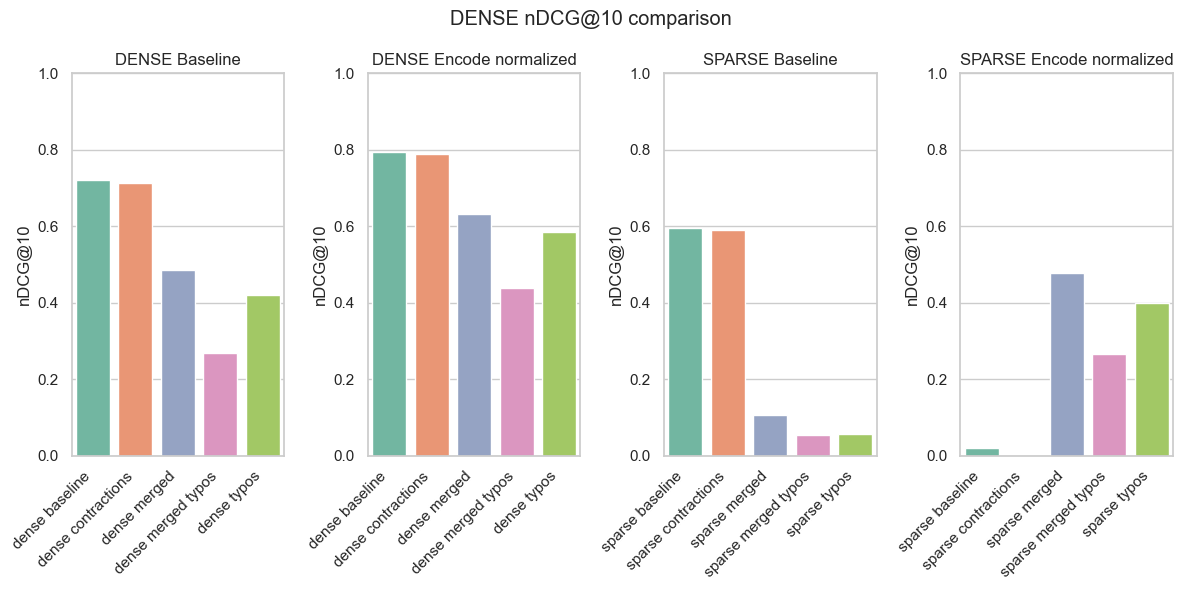

In [53]:
# Define a color palette (one color per bar)
colors = sns.color_palette(
    "Set2", len(df_dense_results)
)  # Change Set2 to another palette if needed

fig, axes = plt.subplots(1, len(results_list), figsize=(12, 6))

# Iterate over each result in results_list and create a barplot
for i, (df, result_name) in enumerate(zip(results_list, results_name_list)):
    ax = axes[i]
    sns.barplot(x="Run", y=metric_name, data=df, ax=ax, hue="Run", palette=colors)
    ax.set_title(f"{result_name}")
    xticks = ax.get_xticks()  # Get the current tick positions
    ax.set_xticks(xticks)  # Set tick positions explicitly
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_xlabel("")  # Remove x-axis label
    ax.set_ylim(0, 1)  # Set y-axis limits from 0 to 1

# Adjust layout for better readability
plt.suptitle(suptitle)
plt.tight_layout()
plt.show()